In [5]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries
import time


%matplotlib inline

df = pd.read_csv('loan.csv', low_memory=False)

# Copy of the dataframe
original_df = df.copy()

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# This method prints information about a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [7]:
# Total number of columns in df
len(df.columns)

74

In [8]:
# Replace the name of some columns
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

# Good Loans vs Bad Loans

In this section, we will see what is the amount of bad loans Lending Club has declared so far

**Average annual income** is an important key metric for finding possible opportunities of investments in a specific region.

**Loan_status** can be another metric

1. Current - being reimbursed in a timely manner
2. Late - 16 and 120 days overdue
3. Default - more than 121 days overdue 
4. Charged-Off - LendingClub decided that the loan will not be paid of
5. fully paid - completed

Note : 5 months after the term of each loan has ended,  it is either **fully paid** or **charged-off**

In [9]:
df["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
# Determining the loans that are bad from loan_status column
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

# Defining a new column loan_condition to qualify good/ bad loans
df['loan_condition'] = np.nan


def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
#calling function using data frame  
df['loan_condition'] = df['loan_status'].apply(loan_condition)

In [11]:
df['loan_condition'].head()

0    Good Loan
1     Bad Loan
2    Good Loan
3    Good Loan
4    Good Loan
Name: loan_condition, dtype: object

D:\Softwares\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0,0.5,'Percentage (%)')]

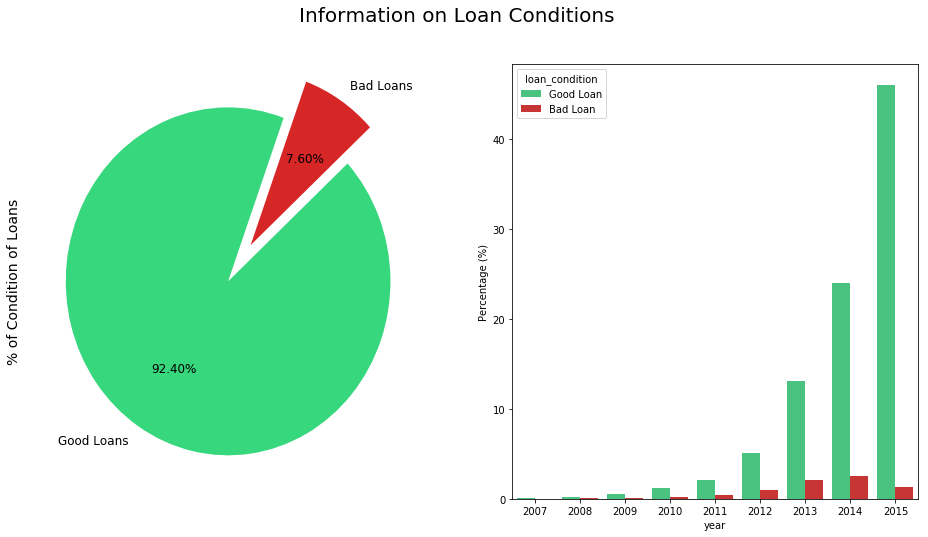

In [12]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#37d77d", "#D72626"]
labels ="Good Loans" , "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=False, colors=colors, 
                                              labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#37d77d", "#E01E1B"]

# Lets' transform the issue dates by year.
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="Percentage (%)")

### Observation:

Currently, bad loans consist 7.60% of total loans <br>
We still have current loans which have the risk of becoming bad loans. 
(So this percentage is subjected to possible changes.)

The year of 2015 was the year were most loans were issued.

# Analysis by region:

What we need to know:
    The number of loans that were classified as bad loans for each region by its loan status <br>
        The level of risk within the regions across the United States

In [13]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [14]:
# We have 67429 loans categorized as bad loans
badloans_df = df.loc[df["loan_condition"] == "Bad Loan"]

number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])

number_of_loanstatus

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days)
region,,,,,,
MidWest,7361,175,142,926,354,1820
NorthEast,10671,263,190,1625,585,2799
SouthEast,11094,297,184,1579,600,2925
SouthWest,4774,166,79,708,273,1407
West,11348,318,166,1415,545,2640


In [15]:
# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))

In [16]:
loan_status_cross

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days)
region,,,,,,
MidWest,16.27,14.36,18.66,14.81,15.02,15.70
NorthEast,23.58,21.58,24.97,25.99,24.82,24.15
SouthEast,24.52,24.36,24.18,25.25,25.46,25.24
SouthWest,10.55,13.62,10.38,11.32,11.58,12.14
West,25.08,26.09,21.81,22.63,23.12,22.78


In [17]:
charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()

In [18]:
charged = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)

defaults = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y=default,
    name='Defaults',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)

credit_policy = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= not_meet_credit,
    name='Does not meet Credit Policy',
    marker = dict(
        color='rgb(229, 121, 36)'
    ),
    text = '%'
)

grace = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= grace_period,
    name='Grace Period',
    marker = dict(
        color='rgb(147, 147, 147)'
    ),
    text = '%'
)

short_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= short_pay,
    name='Late Payment (16-30 days)', 
    marker = dict(
        color='rgb(246, 157, 135)'
    ),
    text = '%'
)

long_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= long_pay,
    name='Late Payment (31-120 days)',
    marker = dict(
        color = 'rgb(238, 76, 73)'
        ),
    text = '%'
)




data = [charged, defaults, credit_policy, grace, short_pays, long_pays]
layout = go.Layout(
    barmode='stack',
    title = '% of Bad Loan Status by Region',
    xaxis=dict(title='US Regions')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

Observation:
    
1. The regions of the West and SouthEast had a higher percentage in most of the b "bad" loan statuses.
2. The NorthEast region had a higher percentage in Grace Period and Does not meet Credit Policy loan status. However, both of these are not considered as bad as default for instance.
3. Based on this small and brief summary we can conclude that the West and SouthEast regions have the most undesirable loan status, but just by a slightly higher percentage compared to the NorthEast region.
4. Again, this does not tell us what causes a loan to be a bad loan , but it gives us some idea about the level of risk within the regions across the United States.

# Analysis by Income Category:

What we need to know: 

1. Low income category: Borrowers that have an annual income lower or equal to 100,000 usd.
2. Medium income category: Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd.
3. High income category: Borrowers that have an annual income higher tha 200,000 usd.

In [19]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High' 

In [20]:
df['loan_condition_int'] = np.nan

In [21]:
# Converting loan_condition (Good / Bad) into (1 / 0) integer

df['loan_condition_int'] = np.nan
def to_int1(condition):
    if condition == 'Good Loan':
        return 1
    elif condition == 'Bad Loan':
        return 0

df['loan_condition_int'] = df['loan_condition'].apply(to_int1)

In [22]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0
    
    

D:\Softwares\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



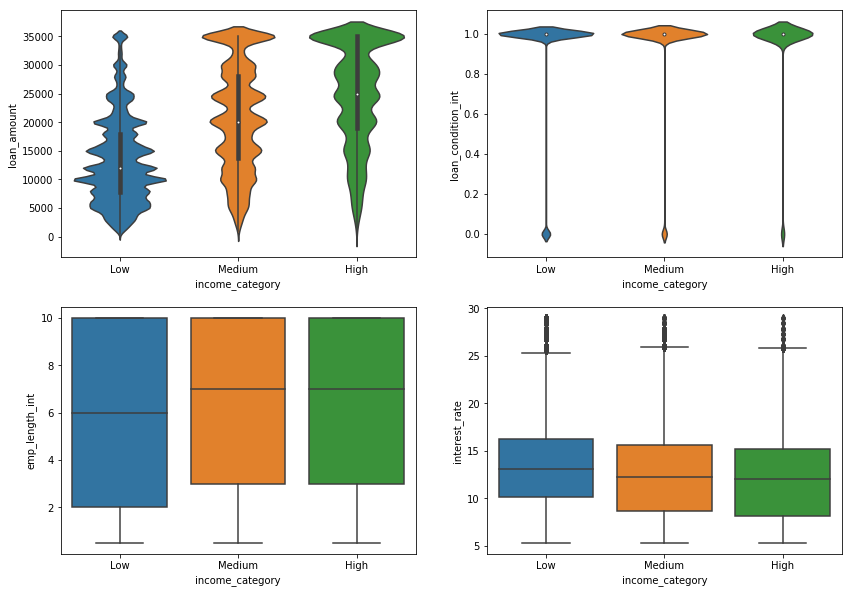

In [23]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,10))

sns.violinplot(x="income_category", y="loan_amount", data=df, ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=df, ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df,  ax=ax3)
sns.boxplot(x="income_category", y="interest_rate", data=df,  ax=ax4)

**Obsrvation:**

1. Borrowers that made part of the high **income category** took higher **loan amounts** than people from low and medium income categories. Of course, people with higher annual incomes are more likely to pay loans with a higher amount. (First row to the left of the subplots)
2. Loans that were borrowed by the Low income category had a slightly higher change of becoming a bad loan. (First row to the right of the subplots)
3. Borrowers with High and Medium annual incomes had a longer employment length than people with lower incomes.(Second row to the left of the subplots)
4. Borrowers with a lower income had on average higher interest rates while people with a higher annual income had lower interest rates on their loans. (Second row to the right of the subplots)

# The Importance of Credit Scores:

Credit scores are important metrics for assesing the overall level of risk. In this section we will analyze the level of risk as a whole and how many loans were bad loans by the type of grade received in the credit score of the customer.

What we need to know:<br>
The lower the grade of the credit score, the higher the risk for investors.

In [41]:

#cmap = plt.cm.coolwarm



In [24]:
# issue dates is converted to year previously and grade
by_credit_score = df.groupby(['year', 'grade']).loan_amount.mean()
by_credit_score

year  grade
2007  A         5015.384615
      B         8337.755102
      C         8275.709220
      D         8005.555556
      E         8138.250000
      F        11850.961538
      G        10847.857143
2008  A         6234.512579
      B         9174.705387
      C         8840.086207
      D         8972.136038
      E         8988.859649
      F        11137.612613
      G        11653.779070
2009  A         7232.481297
      B        10861.920415
      C         9779.247033
      D        10648.867809
      E        11899.918831
      F        12649.761905
      G        11930.000000
2010  A         8771.855124
      B        10917.636290
      C        10057.850861
      D        10985.676393
      E        12257.718295
      F        14694.694534
      G        18022.744361
2011  A         8977.632951
      B        11371.835491
                   ...     
      F        20169.217452
      G        21260.837438
2012  A        11143.649665
      B        11869.462906
      C 

In [25]:
by_inc = df.groupby(['year', 'grade']).interest_rate.mean()
by_inc

year  grade
2007  A         7.757564
      B         9.418163
      C        10.847589
      D        12.551616
      E        14.125000
      F        15.578462
      G        17.364857
2008  A         8.357044
      B        10.366077
      C        11.834621
      D        13.363819
      E        14.808772
      F        16.290270
      G        18.105233
2009  A         8.637664
      B        11.791204
      C        13.320950
      D        14.930979
      E        16.494935
      F        18.243810
      G        20.007455
2010  A         7.145756
      B        10.737998
      C        13.485115
      D        15.286355
      E        16.910873
      F        18.694855
      G        20.660075
2011  A         7.107155
      B        11.080778
                 ...    
      F        20.382493
      G        21.960690
2012  A         7.611371
      B        12.150067
      C        15.265656
      D        18.415520
      E        21.059149
      F        23.091916
      G      

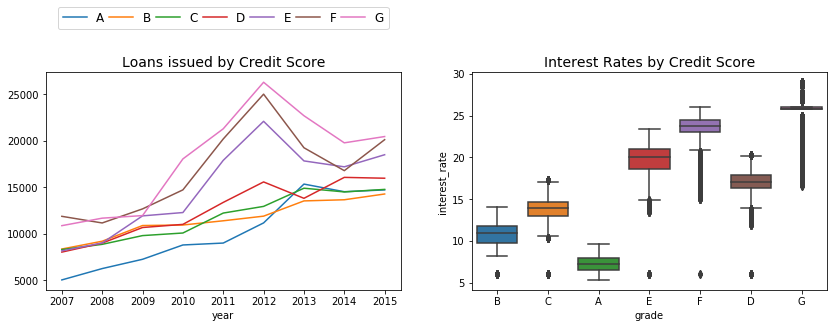

In [26]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
#Pivot a level of the (necessarily hierarchical) index labels, 
#returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.
pivoted_credit_score = by_credit_score.unstack()
pivoted_credit_score.plot(legend=False, ax=ax1, figsize=(14, 4))
ax1.set_title('Loans issued by Credit Score', fontsize=14)
#pivoted_by_inc = by_inc.unstack()
#pivoted_by_inc.plot(ax=ax2, figsize=(14, 4))
sns.boxplot(x="grade", y="interest_rate", data=df,  ax=ax2 )

ax2.set_title('Interest Rates by Credit Score', fontsize=14)

# Bbox coordinates are interpreted in the coordinate system given by bbox_transform
# If a 4-tuple or BboxBase is given, then it specifies the bbox (x, y, width, height)
# ncol - The number of columns that the legend has (here A to G --> 7)
ax1.legend(bbox_to_anchor=(0, 0.4, 1, 1.7), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=1)

In [27]:
df_correlations = df.corr()

In [28]:
df_correlations.head()

,loan_amount,funded_amount,investor_funds,interest_rate,installment,annual_income,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year,loan_condition_int,emp_length_int
loan_amount,1.000000,0.999263,0.997115,0.145023,0.944977,0.332698,0.020675,-0.000159,-0.034168,-0.038080,...,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928,0.103722,-0.003512,0.106435
funded_amount,0.999263,1.000000,0.998025,0.145160,0.946005,0.332466,0.021075,0.000151,-0.034711,-0.038117,...,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928,0.108607,-0.002808,0.106702
investor_funds,0.997115,0.998025,1.000000,0.145205,0.943632,0.331420,0.022185,0.000648,-0.038880,-0.035778,...,-0.028118,0.412268,0.018969,0.312473,0.009548,0.071515,0.007820,0.125068,-0.000007,0.108271
interest_rate,0.145023,0.145160,0.145205,1.000000,0.133075,-0.072786,0.079903,0.055178,0.227650,-0.030033,...,0.171105,-0.104402,0.288049,-0.166119,0.171162,0.020711,0.252637,-0.063632,-0.175450,0.009170
installment,0.944977,0.946005,0.943632,0.133075,1.000000,0.326182,0.014333,0.007876,-0.003623,-0.041391,...,-0.004324,0.385694,0.025131,0.286829,0.015213,0.056176,0.029699,0.075157,-0.014124,0.090781


In [29]:
#low annual income, high debt to income, high interest rates, low grade, among others.
df2 = df[['annual_income', 'loan_amount', 'interest_rate', 'emp_length_int']]

In [30]:
df_correlations = df2.corr()


trace = go.Heatmap(z=df_correlations.values,
                   x=df_correlations.columns,
                   y=df_correlations.columns,
                  colorscale=[[0.0, 'rgb(165,0,38)'], 
                              [0.1111111111111111, 'rgb(215,48,39)'], 
                              [0.2222222222222222, 'rgb(244,109,67)'], 
                              [0.3333333333333333, 'rgb(253,174,97)'], 
                              [0.4444444444444444, 'rgb(254,224,144)'], 
                              [0.5555555555555556, 'rgb(224,243,248)'], 
                              [0.6666666666666666, 'rgb(171,217,233)'], 
                              [0.7777777777777778, 'rgb(116,173,209)'], 
                              [0.8888888888888888, 'rgb(69,117,180)'], 
                              [1.0, 'rgb(49,54,149)']],
            colorbar = dict(
            title = 'Level of Correlation',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-0.52,0.2,0.95],
            ticktext = ['Negative Correlation','Low Correlation','Positive Correlation'],
            ticks = 'outside'
        )
                  )


layout = {"title": "Correlation Heatmap"}
data=[trace]

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')


# Condition of Loans and Purpose:

Text(0.5,1,"how 'home_ownership' affects 'int_rate'")

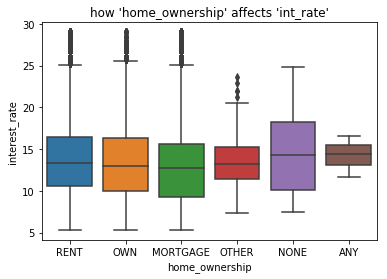

In [31]:
plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='home_ownership',y="interest_rate",data = df)
plt.title("how 'home_ownership' affects 'int_rate'")

Text(0.5,1,"how 'application type' affects 'interest rate'")

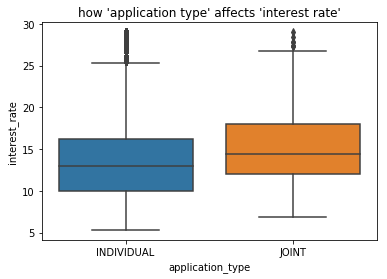

In [32]:
plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='application_type',y="interest_rate",data = df)
plt.title("how 'application type' affects 'interest rate'")

# Data Preprocessing

In [69]:
# Missing Values

In [33]:
total = np.product(df.shape) # total will be 65666046
miss_values = df.isnull().sum().sum() # Total missing values are 17998490

In [34]:
per_total = (miss_values/total)*100
print(f"The total percentage of missing values in data set is {(per_total)}")

The total percentage of missing values in data set is 26.598809141904695


In [35]:
print(df.isnull().any().value_counts(), "\n")

print(f"The columns that have missing values are total {df.isnull().any().sum()}")

True     39
False    34
dtype: int64 

The columns that have missing values are total 39


In [73]:
# Creating a Data Frame of the columns having missing values with the percentage and total number of misisng values.

In [36]:
total_num = df.isnull().sum().sort_values(ascending=False)

perc = df.isnull().sum()/df.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

D:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [37]:
top_mis = df_miss[df_miss["Percentage %"]>0]
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage %
0,dti_joint,886870,99.94
1,annual_inc_joint,886868,99.94
2,verification_status_joint,886868,99.94
3,il_util,868762,97.90
4,mths_since_rcnt_il,866569,97.65
5,total_cu_tl,866007,97.59
6,inq_fi,866007,97.59
7,inq_last_12m,866007,97.59
8,max_bal_bc,866007,97.59
9,open_rv_24m,866007,97.59


Above table shows our which features has maximum missing values in descending order.

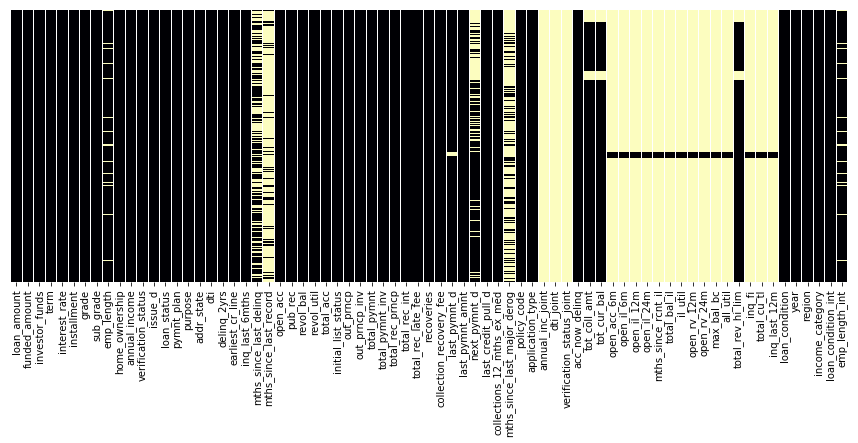

In [38]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="magma" )

Above heatmap shows how many values are missing in every columns. All the light colored columns represents the amount of missing values present in that specific column.

Text(0,0.5,'% missing data')

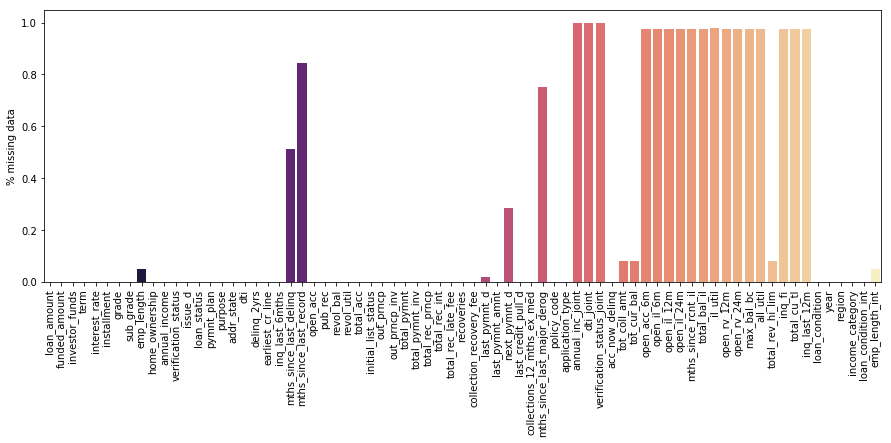

In [39]:
null_perc = df.isnull().sum()/df.isnull().count()

plt.figure(figsize=(15,5))

sns.barplot(x = np.arange(len(null_perc)), y =null_perc, palette="magma")

plt.xticks(np.arange(len(null_perc)),null_perc.index,rotation=90)
plt.ylabel('% missing data')

Handling Missing Values:

Step 1 Droping all the columns which have missing values more than 80% and the redundant columns

In [40]:
df.drop(top_mis[top_mis["Percentage %"]>75]["index"], axis = 1, inplace=True)

Dropping columns based on their redundancy.

In [41]:
df.drop(["next_pymnt_d","mths_since_last_delinq"]
        , axis = 1, inplace=True)

In [42]:
df.drop(["last_pymnt_d", "last_credit_pull_d", "earliest_cr_line", "issue_d", "addr_state"], axis =1 , inplace = True)

Step 4 Filling up missing values

In [43]:
df["tot_cur_bal"] = df["tot_cur_bal"].fillna(df["tot_cur_bal"].mean())

df["tot_coll_amt"] = df["tot_coll_amt"].fillna(0)

df["emp_length"]=df["emp_length"].fillna(0)

df["revol_util"]= df["revol_util"].fillna(df["revol_util"].mean())

df["collections_12_mths_ex_med"]= df["collections_12_mths_ex_med"].fillna(df["collections_12_mths_ex_med"].mean())

df["acc_now_delinq"]=df["acc_now_delinq"].fillna(df["acc_now_delinq"].mode())

df["delinq_2yrs"]=df["delinq_2yrs"].fillna(0)

df["inq_last_6mths"]= df["inq_last_6mths"].fillna(0)

df["pub_rec"]= df["pub_rec"].fillna(0)

df["acc_now_delinq"]= df["acc_now_delinq"].fillna(0)

df["open_acc"]= df["open_acc"].fillna(df["open_acc"].mean())

Check missing 

115138


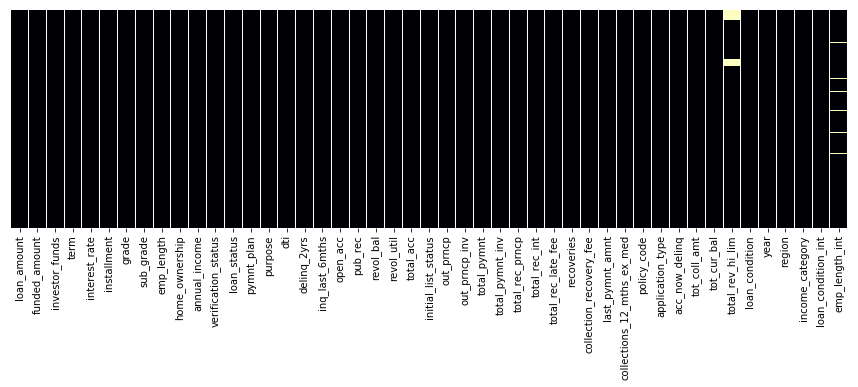

In [44]:
tot_cel = df.isnull().sum().sum()
print(tot_cel)
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="magma" )

In [45]:
df

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,emp_length,home_ownership,...,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_condition,year,region,income_category,loan_condition_int,emp_length_int
0,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.0,0.0,139458.189336,NaN,Good Loan,2011,SouthWest,Low,1,10.0
1,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0.0,0.0,139458.189336,NaN,Bad Loan,2011,SouthEast,Low,0,0.5
2,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.0,0.0,139458.189336,NaN,Good Loan,2011,MidWest,Low,1,10.0
3,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.0,0.0,139458.189336,NaN,Good Loan,2011,West,Low,1,10.0
4,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,1 year,RENT,...,0.0,0.0,139458.189336,NaN,Good Loan,2011,West,Low,1,1.0
5,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,3 years,RENT,...,0.0,0.0,139458.189336,NaN,Good Loan,2011,SouthWest,Low,1,3.0
6,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,8 years,RENT,...,0.0,0.0,139458.189336,NaN,Good Loan,2011,SouthEast,Low,1,8.0
7,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,9 years,RENT,...,0.0,0.0,139458.189336,NaN,Good Loan,2011,West,Low,1,9.0
8,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,4 years,OWN,...,0.0,0.0,139458.189336,NaN,Bad Loan,2011,West,Low,0,4.0
9,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,< 1 year,RENT,...,0.0,0.0,139458.189336,NaN,Bad Loan,2011,SouthWest,Low,0,0.5
